## Loan applicant’s risk classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('Project_7_KNN_Loan_Applicant.xlsx')
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


## basic Data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


## Describe Data

In [5]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


## Unique values of Total bounces past12months 

In [6]:
df['Total bounces past12months'].unique()

array([ 0,  1,  2,  3,  9,  7, 10,  4,  5,  8,  6, 12, 11], dtype=int64)

## Find Nill value in data

In [7]:
df.isna().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

## there if nom Null values in data

## scatterplot between age & Total work Experience

<AxesSubplot:xlabel='Age', ylabel='Total Work Experience'>

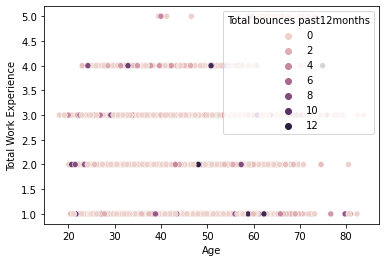

In [8]:
sns.scatterplot(x='Age',y='Total Work Experience',data=df, hue='Total bounces past12months')

## box plot for age

<AxesSubplot:xlabel='Age'>

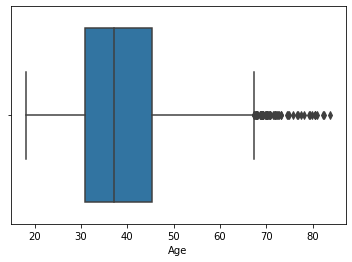

In [9]:
sns.boxplot('Age', data=df)

## box plot for Cibil score

<AxesSubplot:xlabel='Cibil score'>

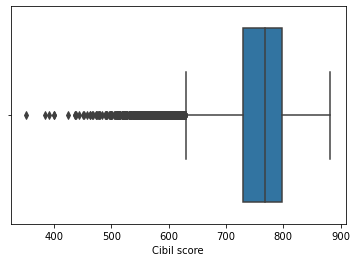

In [10]:
sns.boxplot('Cibil score', data=df)

## Create target and features data

In [11]:
x=df.drop(['Total bounces past12months'], axis=1)
y=df['Total bounces past12months']

## Split data into training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

## Model - KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [16]:
model.score(x_test,y_test)

0.6309060589216231

In [17]:
model.score(x_train,y_train)

0.6823235130628127

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [21]:
accuracy_score(y_pred,y_test)

0.6309060589216231

<AxesSubplot:>

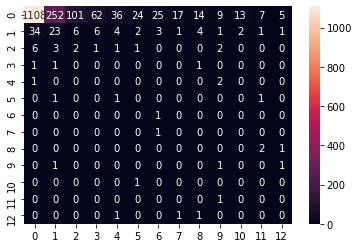

In [22]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')

##  whith different K values, K range 1 to 15

In [23]:
for i in range(1,15):
    model1=KNeighborsClassifier(i)
    model1.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'{i} test score : {model1.score(x_test,y_test)}')
    print(f'{i} train score : {model1.score(x_train,y_train)}\n')

1 test score : 0.5336297943301834
1 train score : 1.0

2 test score : 0.6175653140633686
2 train score : 0.7468037798777099

3 test score : 0.6153418565869928
3 train score : 0.7133129516397999

4 test score : 0.6242356864924958
4 train score : 0.6906614785992218

5 test score : 0.6309060589216231
5 train score : 0.6823235130628127

6 test score : 0.6364647026125625
6 train score : 0.6753752084491385

7 test score : 0.6370205669816564
7 train score : 0.6707893274041133

8 test score : 0.6336853807670928
8 train score : 0.6657865480822679

9 test score : 0.6347971095052807
9 train score : 0.6663424124513618

10 test score : 0.6392440244580322
10 train score : 0.6641189549749861

11 test score : 0.642023346303502
11 train score : 0.6613396331295164

12 test score : 0.6397998888271261
12 train score : 0.660366870483602

13 test score : 0.6403557531962201
13 train score : 0.6589772095608671

14 test score : 0.6403557531962201
14 train score : 0.6592551417454141



##  Applying All Algorithm 

In [24]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [25]:
models={'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'tree':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis()
       }

In [26]:
for name, model in models.items():
    model1=model.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(y_test,y_pred)}") 
    print(f'{name} accuracy score: {accuracy_score(y_test, y_pred)}')
#     print(f'{name} precision score: {precision_score(y_test,y_pred)}')
#     print(f'{name} recall score: {recall_score(y_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(y_test,y_pred)}\n\n')

lr confuion matrix: 
 [[1149    0    0    1    0    0    0    0    0    0    0    0    0]
 [ 281    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 108    0    0    0    0    0    1    0    0    0    0    0    0]
 [  68    1    0    0    0    0    0    0    0    0    0    0    0]
 [  37    6    0    0    0    0    0    0    0    0    0    0    0]
 [  23    5    0    0    0    0    0    0    0    0    0    0    0]
 [  20    9    1    0    0    0    0    0    0    0    0    0    0]
 [  15    4    0    0    0    0    0    0    0    0    0    0    0]
 [  13    5    1    0    0    0    1    0    0    0    0    0    0]
 [   7    8    1    0    0    0    0    0    0    0    0    0    0]
 [  10    5    0    0    0    0    0    0    0    0    0    0    0]
 [   5    5    1    0    0    0    0    0    0    0    0    0    0]
 [   4    4    0    0    0    0    0    0    0    0    0    0    0]]
lr accuracy score: 0.6386881600889383
lr classification report :
               precision    

knn confuion matrix: 
 [[1108   34    6    1    1    0    0    0    0    0    0    0    0]
 [ 252   23    3    1    0    1    0    0    0    1    0    0    0]
 [ 101    6    2    0    0    0    0    0    0    0    0    0    0]
 [  62    6    1    0    0    0    0    0    0    0    0    0    0]
 [  36    4    1    0    0    1    0    0    0    0    0    0    1]
 [  24    2    1    0    0    0    0    0    0    0    1    0    0]
 [  25    3    0    0    0    0    1    1    0    0    0    0    0]
 [  17    1    0    0    0    0    0    0    0    0    0    0    1]
 [  14    4    0    1    0    0    0    0    0    0    0    0    1]
 [   9    1    2    0    2    0    0    0    0    1    0    1    0]
 [  13    2    0    0    0    0    0    0    0    0    0    0    0]
 [   7    1    0    0    0    1    0    0    2    0    0    0    0]
 [   5    1    0    0    0    0    0    0    1    1    0    0    0]]
knn accuracy score: 0.6309060589216231
knn classification report :
               precision 